In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [2]:
from collections import Counter
len(Counter(train_y))

10

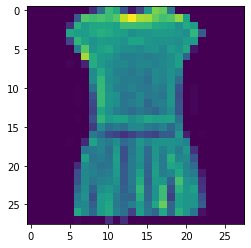

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_X[3])

In [5]:
train_label = tf.keras.utils.to_categorical(train_y, num_classes = 10)
test_label = tf.keras.utils.to_categorical(test_y, num_classes = 10)

In [7]:
train_input = tf.data.Dataset.from_tensor_slices((train_X, train_label)).batch(50)
test_input = tf.data.Dataset.from_tensor_slices((test_X, test_label)).batch(50)

In [8]:
input_data = tf.keras.Input([28,28])

In [9]:
dense = tf.keras.layers.Flatten()(input_data)

In [10]:
dense = tf.keras.layers.Dense(100, activation='relu')(dense)
dense = tf.keras.layers.Dense(100, activation='relu')(dense)
dense = tf.keras.layers.Dense(100, activation='relu')(dense)
dense = tf.keras.layers.Dense(100, activation='relu')(dense)

In [11]:
output_data = tf.keras.layers.Dense(10, activation='softmax')(dense)

In [12]:
model=tf.keras.Model(inputs = input_data, outputs=output_data)

In [14]:
model.compile(optimizer = tf.optimizers.Adam(0.001), 
             loss = tf.losses.categorical_crossentropy,
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010  

In [16]:
model.fit(train_input, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 6s 4ms/step - loss: 1.0561 - accuracy: 0.7640
Epoch 2/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4848 - accuracy: 0.8284
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4351 - accuracy: 0.8444
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4059 - accuracy: 0.8535
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3866 - accuracy: 0.8598
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3725 - accuracy: 0.8640
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3573 - accuracy: 0.8709
Epoch 8/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3438 - accuracy: 0.8740
Epoch 9/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3348 - accuracy: 0.8771
Epoch 10/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.325

In [17]:
model.evaluate(test_input)

200/200 [==============================] - 1s 3ms/step - loss: 0.4134 - accuracy: 0.8596


[0.4134465456008911, 0.8596000075340271]

In [19]:
train_data = tf.expand_dims(train_X, -1)
test_data = tf.expand_dims(test_X, -1)

In [21]:
train_input= tf.data.Dataset.from_tensor_slices((train_data, train_label)).batch(50)
test_input = tf.data.Dataset.from_tensor_slices((test_data, test_label)).batch(50)

In [22]:
input_data = tf.keras.layers.Input([28,28,1])

In [24]:
conv = tf.keras.layers.Conv2D(30,5, padding='SAME', activation='relu')(input_data)
conv = tf.keras.layers.Conv2D(30,5, padding='SAME', activation='relu')(conv)

In [25]:
conv = tf.keras.layers.MaxPool2D(strides=[2,2])(conv)
conv = tf.keras.layers.Conv2D(30,5,padding='SAME', activation='relu')(conv)

In [26]:
dense = tf.keras.layers.Flatten()(conv)
output_data= tf.keras.layers.Dense(10, activation='relu')(dense)

In [27]:
model = tf.keras.Model(inputs=input_data, outputs = output_data)
model.compile(optimizer = tf.optimizers.Adam(0.001),
             loss = tf.losses.categorical_crossentropy,
             metrics = ['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 30)        780       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 30)        22530     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 30)        22530     
                                                                 
 flatten_1 (Flatten)         (None, 5880)              0         
                                                           

In [28]:
model.fit(train_input, epochs=1)
model.evaluate(test_input)

200/200 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [29]:
model.save('./model.h5')

In [30]:
modelx = tf.keras.models.load_model('./model.h5')
modelx.evaluate(test_input)

200/200 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]